In [1]:
'''do's and dont's in corporate 
DO's 
1.document your work
2.explore and visualize data
3.validate assumptions
4.communicate your insights effectively
5.update with latest tools and techniques
DONT'S
1.dont give biassed results
2.dont misinterrupt correlation'''

"do's and dont's in corporate \nDO's \n1.document your work\n2.explore and visualize data\n3.validate assumptions\n4.communicate your insights effectively\n5.update with latest tools and techniques\nDONT'S\n1.dont give biassed results\n2.dont misinterrupt correlation"

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
target= df['Survived']

In [63]:
numerical_cols=df.select_dtypes(include=['number'])
y=numerical_cols['Survived']
x=numerical_cols.drop(columns='Survived',axis=1)
da=x.corr().round(2)
da

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.04,0.04,-0.06,-0.00,0.01
Pclass,-0.04,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,-0.55,0.10,0.16,0.22,1.00


<Axes: >

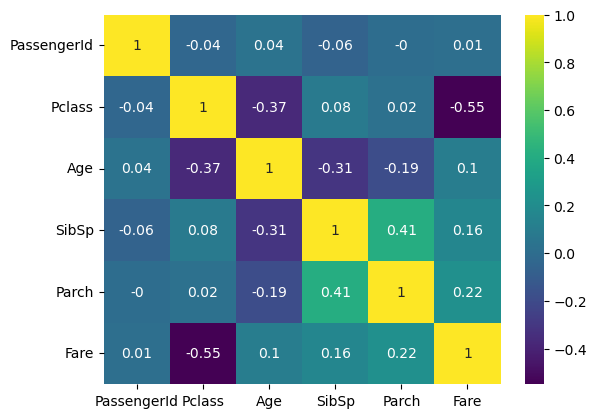

In [64]:
sns.heatmap(da,annot=True,cmap='viridis')

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder #for orbinal data

data = {'Difficulty': ['Easy', 'Medium', 'Hard', 'Medium', 'Easy'],
        'Test Score': [50, 60, 70, 80, 90]}
df = pd.DataFrame(data)
encoder = LabelEncoder()
df['difficulty_encoded'] = encoder.fit_transform(df['Difficulty'])
print(df)
correlation=df['difficulty_encoded'].corr(df['Test Score'])
print("correlation",correlation)

  Difficulty  Test Score  difficulty_encoded
0       Easy          50                   0
1     Medium          60                   2
2       Hard          70                   1
3     Medium          80                   2
4       Easy          90                   0
correlation 0.0


In [73]:
#one-hot encoding
data={'color': ['Red','Blue','Green','Blue','Red'],
     'Test Score':[50,60,70,80,90]}
df=pd.DataFrame(data)
df_encoded=pd.get_dummies(df,columns=['color'])
print(df_encoded)
correlation=df_encoded['color_Red'].corr(df_encoded['Test Score'])
print("correlation with red:",correlation)

   Test Score  color_Blue  color_Green  color_Red
0          50       False        False       True
1          60        True        False      False
2          70       False         True      False
3          80        True        False      False
4          90       False        False       True
correlation with red: -1.2819751242557094e-17
